# Perceptrons

The perceptron is an artificial neuron that can make a simple decision. Let’s implement one from scratch in Python!

The perceptron has three main components:

Inputs: Each input corresponds to a feature. For example, in the case of a person, features could be age, height, weight, college degree, etc.

Weights: Each input also has a weight which assigns a certain amount of importance to the input. If an input’s weight is large, it means this input plays a bigger role in determining the output. For example, a team’s skill level will have a bigger weight than the average age of players in determining the outcome of a match.

Output: Finally, the perceptron uses the inputs and weights to produce an output. The type of the output varies depending on the nature of the problem. For example, to predict whether or not it’s going to rain, the output has to be binary — 1 for Yes and 0 for No. However, to predict the temperature for the next day, the range of the output has to be larger — say a number from 70 to 90.

## Structure of a perceptron

In [9]:
class Perceptron:
  def __init__(self, num_inputs=2, weights=[1,1]):
    self.num_inputs = num_inputs
    self.weights = weights

cool_perceptron = Perceptron()
print(cool_perceptron)

## 1. Weighted sum

What is the weighted sum? This is just a number that gives a reasonable representation of the inputs

Here’s how we can implement it:

1. Start with a weighted sum of 0. Let’s call it weighted_sum.
2. Start with the first input and multiply it by its corresponding weight. Add this result to weighted_sum.
3. Go to the next input and multiply it by its corresponding weight. Add this result to weighted_sum.
4. Repeat this process for all inputs.

In [10]:
class Perceptron:
  def __init__(self, num_inputs=2, weights=[2,1]):
    self.num_inputs = num_inputs
    self.weights = weights
    
  def weighted_sum(self, inputs):
    weighted_sum = 0
    for i in range(self.num_inputs):
      weighted_sum += self.weights[i]*inputs[i]
      #complete this loop
    return weighted_sum

cool_perceptron = Perceptron()
print(cool_perceptron.weighted_sum([24, 55]))
# The weighted sum should be 103 when the weights are [2, 1]
# weighted sum = 24dot2 + 55dot1 = 103

103


## 2. Activation function

These are special functions that transform the weighted sum into a desired and constrained output.

For example, if you want to train a perceptron to detect whether a point is above or below a line (which we will be doing in this lesson!), you might want the output to be a +1 or -1 label. For this task, you can use the “sign activation function” to help the perceptron make the decision:

In [11]:
class Perceptron:
  def __init__(self, num_inputs=2, weights=[1,1]):
    self.num_inputs = num_inputs
    self.weights = weights
    
  def weighted_sum(self, inputs):
    weighted_sum = 0
    for i in range(self.num_inputs):
      weighted_sum += self.weights[i]*inputs[i]
    return weighted_sum
  
  def activation(self, weighted_sum):
    if weighted_sum >= 0:
      return 1
    else:
      return -1

cool_perceptron = Perceptron()
print(cool_perceptron.weighted_sum([24, 55]))
print(cool_perceptron.activation(52))

79
1


## Training the Perceptron

Right now we expect the perceptron to be very bad because it has random weights. We haven’t taught it anything yet, so we can’t expect it to get classifications correct! The good news is that we can train the perceptron to produce better and better results! In order to do this, we provide the perceptron a training set — a collection of random inputs with correctly predicted outputs.

## Training error

Every time the output mismatches the expected label, we say that the perceptron has made a training error — a quantity that measures “how bad” the perceptron is performing.

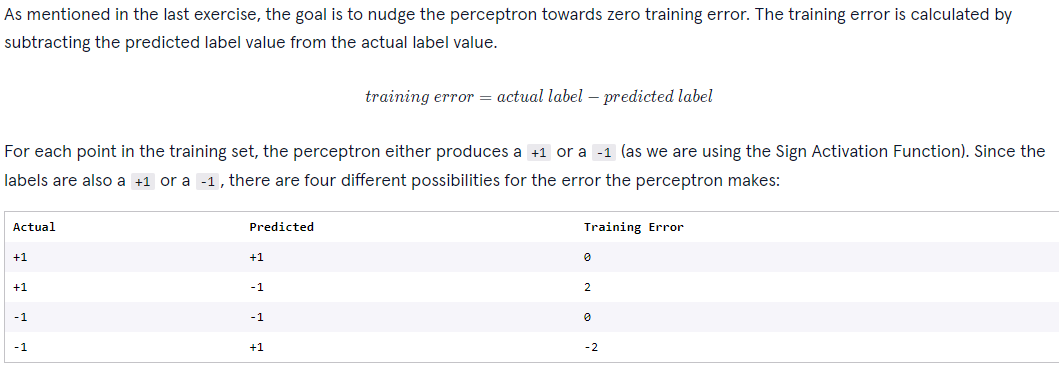




In [12]:
class Perceptron:
  def __init__(self, num_inputs=2, weights=[1,1]):
    self.num_inputs = num_inputs
    self.weights = weights
    
  def weighted_sum(self, inputs):
    weighted_sum = 0
    for i in range(self.num_inputs):
      weighted_sum += self.weights[i]*inputs[i]
    return weighted_sum
  
  def activation(self, weighted_sum):
    if weighted_sum >= 0:
      return 1
    if weighted_sum < 0:
      return -1
    
  def training(self, training_set):
    for inputs in training_set:
      prediction = self.activation(self.weighted_sum(inputs))
      actual = training_set[inputs]
      error = actual - prediction
      
cool_perceptron = Perceptron()
print(cool_perceptron.weighted_sum([24, 55]))
print(cool_perceptron.activation(52))

79
1


## Tweaking the Weights

What do we do once we have the errors for the perceptron? We slowly nudge the perceptron towards a better version of itself that eventually has zero error.

The only way to do that is to change the parameters that define the perceptron. We can’t change the inputs so the only thing that can be tweaked are the weights. As we change the weights, the outputs change as well.

The goal is to find the optimal combination of weights that will produce the correct output for as many points as possible in the dataset.

how do we tweak the weights optimally? This is where the Perceptron Algorithm comes in.

We keep on tweaking the weights until all possible labels are correctly predicted by the perceptron. This means that multiple passes might need to be made through the training_set before the Perceptron Algorithm comes to a halt.

In [13]:
class Perceptron:
  def __init__(self, num_inputs=2, weights=[1,1]):
    self.num_inputs = num_inputs
    self.weights = weights
    
  def weighted_sum(self, inputs):
    weighted_sum = 0
    for i in range(self.num_inputs):
      weighted_sum += self.weights[i]*inputs[i]
    return weighted_sum
  
  def activation(self, weighted_sum):
    if weighted_sum >= 0:
      return 1
    if weighted_sum < 0:
      return -1
    
  def training(self, training_set):
    # (a boolean that indicates whether the perceptron has found a line to separate the positive and negative labels)
    foundLine = False
    #  (a while loop that continues to train the perceptron until the line is found)
    while not foundLine:
      # (to count the total error the perceptron makes in each round)
      total_error = 0
      for inputs in training_set:
        prediction = self.activation(self.weighted_sum(inputs))
        actual = training_set[inputs]
        error = actual - prediction
        # (to update the total error the perceptron makes in each round)
        total_error += abs(error)
        # Update the weight of each input
        # Use the formula: weight = weight + (error * inputs)
        for i in range(self.num_inputs):
          self.weights[i] += error * inputs[i]
      if total_error == 0:
        foundLine = True
      
cool_perceptron = Perceptron()
small_training_set = {(0,3):1, (3,0):-1, (0,-3):-1, (-3,0):1}
# Train cool_perceptron using training set
print(cool_perceptron.training(small_training_set))

None


## The Bias Weight

You have understood that the perceptron can be trained to produce correct outputs by tweaking the regular weights.

However, there are times when a minor adjustment is needed for the perceptron to be more accurate. This supporting role is played by the bias weight. It takes a default input value of 1 and some random weight value.

In [14]:
class Perceptron:
  # Add a 1 to the set of inputs (now there are 3 inputs instead of 2)
  # Add a bias weight to the list of weights (now there are 3 weights instead of 2)
  def __init__(self, num_inputs=3, weights=[1,1,1]):
    self.num_inputs = num_inputs
    self.weights = weights
    
  def weighted_sum(self, inputs):
    weighted_sum = 0
    for i in range(self.num_inputs):
      weighted_sum += self.weights[i]*inputs[i]
    return weighted_sum
  
  def activation(self, weighted_sum):
    if weighted_sum >= 0:
      return 1
    if weighted_sum < 0:
      return -1
    
  def training(self, training_set):
    foundLine = False
    while not foundLine:
      total_error = 0
      for inputs in training_set:
        prediction = self.activation(self.weighted_sum(inputs))
        actual = training_set[inputs]
        error = actual - prediction
        total_error += abs(error)
        for i in range(self.num_inputs):
          self.weights[i] += error*inputs[i]
      if total_error == 0:
        foundLine = True
      
cool_perceptron = Perceptron()

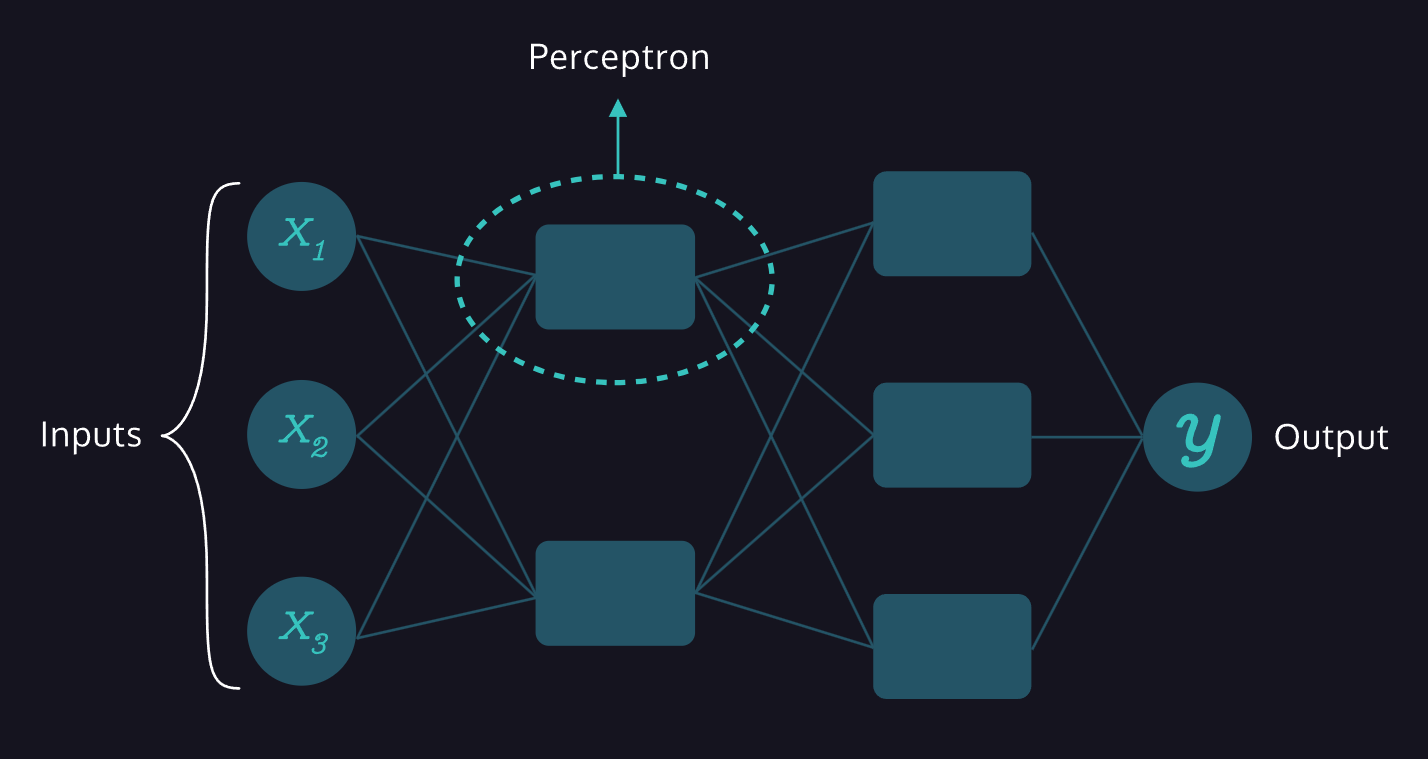

Let’s step back and think about what you just accomplished and see if there are any limits to a single perceptron.

Earlier, the data points in the training set were linearly separable i.e. a single line could easily separate the two dissimilar sets of points.

What would happen if the data points were scattered in such a way that a line could no longer classify the points? A single perceptron with only two inputs wouldn’t work for such a scenario because it cannot represent a non-linear decision boundary.

That’s when more perceptrons and features come into play!

By increasing the number of features and perceptrons, we can give rise to the Multilayer Perceptrons, also known as Neural Networks, which can solve much more complicated problems.

With a solid understanding of perceptrons, you are now ready to dive into the incredible world of Neural Networks!

